In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Problem Statement - Superkart Sales Prediction**

**Context:**

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.



**Objective:**

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.



**Data Description:**

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.



*   Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
*   Product_Weight - the weight of each product
*   Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
*  Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
*  Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
*  Product_MRP - maximum retail price of each product
*  Store_Id - unique identifier of each store
*  Store_Establishment_Year - the year in which the store was established
*  Store_Size - the size of the store depending on sq. feet like high, medium, and low
*  Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
*  Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
*  Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hands_On_Practive/Datasets/SuperKart.csv'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df.shape

(8763, 12)

In [ ]:
df['Product_Id'].nunique() #Can see there are no duplicates

8763

In [ ]:
#Lets look at product weight
df['Product_Weight'].mean()

12.653792080337787

In [ ]:
df['Product_Sugar_Content'].value_counts() #bc it is categorical, we do value cpunts

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [ ]:
df['Product_Type'].value_counts()

Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64

In [ ]:
df['Store_Id'].value_counts()

OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64

In [ ]:
df.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
#Just describe at numberical data
df.describe(include = np.number)

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751,3464.003640
std,2.217320,0.048204,30.694110,8.388381,1065.630494
min,4.000000,0.004000,31.000000,1987.000000,33.000000
25%,11.150000,0.031000,126.160000,1998.000000,2761.715000
50%,12.660000,0.056000,146.740000,2009.000000,3452.340000
75%,14.180000,0.096000,167.585000,2009.000000,4145.165000
max,22.000000,0.298000,266.000000,2009.000000,8000.000000


In [ ]:
df['Product_Sugar_Content'].value_counts()
#reg and Regular should be the same, so lets handle that.


Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [ ]:
df['Product_Sugar_Content'] = df['Product_Sugar_Content'].replace('reg', 'Regular')

In [ ]:
df['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

In [ ]:
#Dataframe product id has charcters and numbers; this coudl be useful for the model
df['Product_Id'].str[:2].value_counts()

FD    6539
NC    1519
DR     705
Name: Product_Id, dtype: int64

In [ ]:
df['Product_Id'] = df['Product_Id'].str[:2]

In [ ]:
df.sample(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
4872,NC,13.72,No Sugar,0.011,Health and Hygiene,144.14,OUT004,2009,Medium,Tier 2,Supermarket Type2,3635.54
1916,NC,10.93,No Sugar,0.055,Health and Hygiene,149.27,OUT004,2009,Medium,Tier 2,Supermarket Type2,3109.08
7535,FD,13.94,Low Sugar,0.133,Snack Foods,150.89,OUT004,2009,Medium,Tier 2,Supermarket Type2,3823.70
2270,FD,13.46,Regular,0.033,Baking Goods,129.62,OUT004,2009,Medium,Tier 2,Supermarket Type2,3278.39
6482,DR,11.05,Low Sugar,0.112,Soft Drinks,120.27,OUT004,2009,Medium,Tier 2,Supermarket Type2,2543.44
6449,FD,9.34,Low Sugar,0.026,Snack Foods,87.95,OUT002,1998,Small,Tier 3,Food Mart,1495.95
7134,FD,8.87,Low Sugar,0.014,Fruits and Vegetables,161.19,OUT004,2009,Medium,Tier 2,Supermarket Type2,2887.99
2479,NC,15.64,No Sugar,0.049,Household,174.12,OUT001,1987,High,Tier 2,Supermarket Type1,4681.66
1531,FD,12.46,Low Sugar,0.049,Frozen Foods,135.85,OUT004,2009,Medium,Tier 2,Supermarket Type2,3181.06
3126,NC,14.68,No Sugar,0.168,Household,115.47,OUT004,2009,Medium,Tier 2,Supermarket Type2,3265.67


Summary

The model does better if the distribution is close to normal/gaussian. Lets see if we need to make our numberical features distributions be same as gaussian

Univariate Analysis - Numerical Features

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='Product_Weight'>

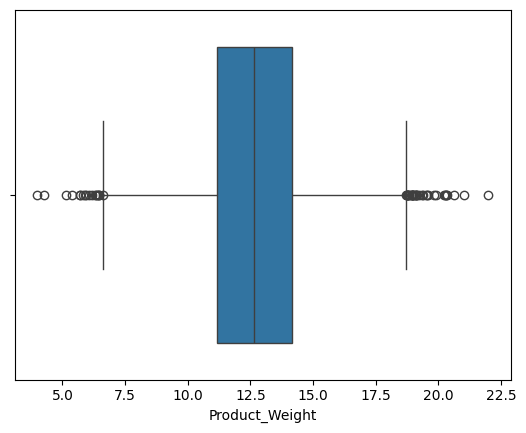

In [ ]:
sns.boxplot(data = df, x = 'Product_Weight')

<Axes: xlabel='Product_Weight', ylabel='Count'>

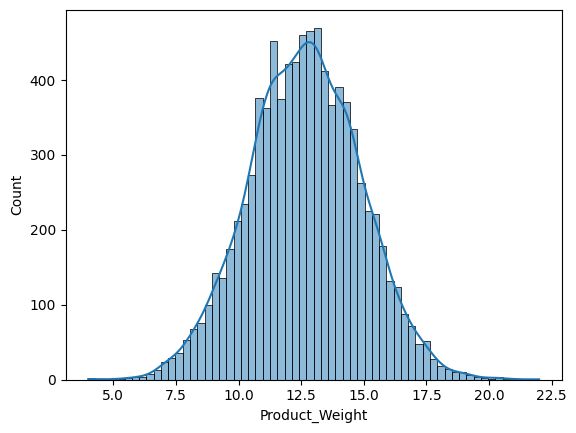

In [ ]:
sns.histplot(data = df, x = 'Product_Weight', kde=True)

This distribution seems symettric

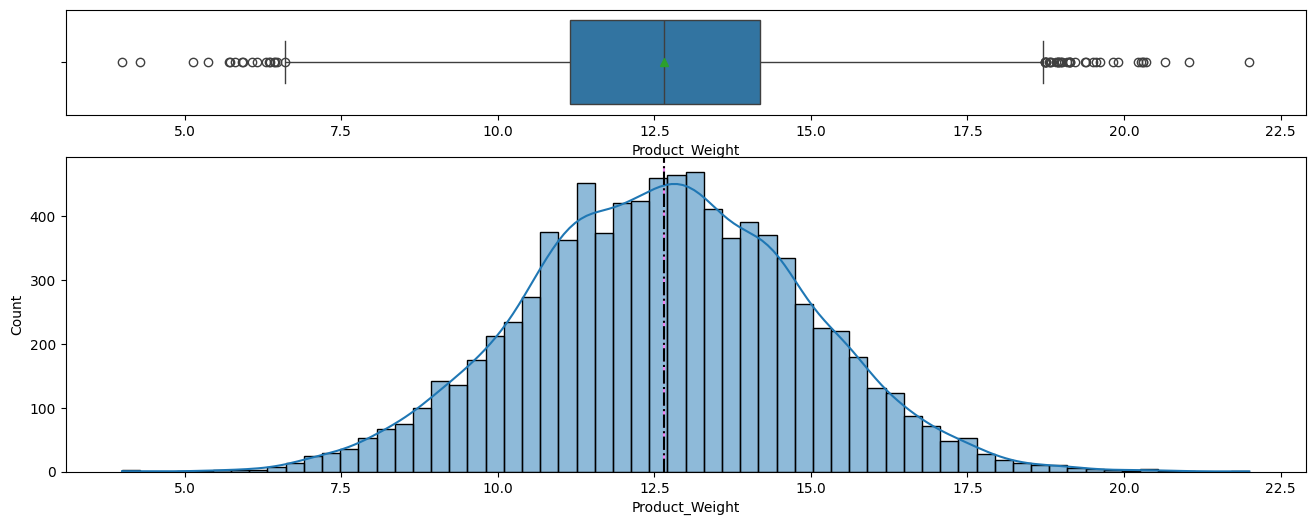

In [ ]:
#You can also plot both at once
fig, ax = plt.subplots(2,1, figsize = (16,6), gridspec_kw = {'height_ratios': (1,3)})

sns.boxplot(data=df, x ='Product_Weight', showmeans = True, ax = ax[0])
sns.histplot(data=df, x ='Product_Weight', ax = ax[1], kde = 'True')
ax[1].axvline(df['Product_Weight'].mean(), linestyle = '--', color = 'violet')
ax[1].axvline(df['Product_Weight'].median(), linestyle = '-.', color = 'black')

In [ ]:
#Define a function to do the above for all our other numerical features
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


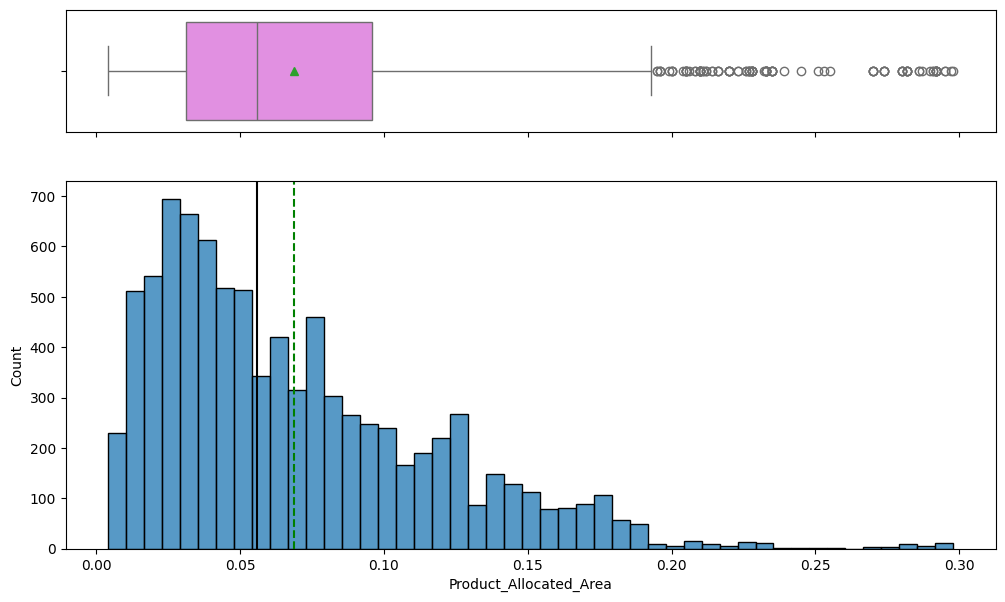

In [ ]:
histogram_boxplot(df, 'Product_Allocated_Area')

Right Skewed: mean > median > mode

Left Skewed: mean < median < mode

Will changing this dist. make my model better?

<Axes: xlabel='Product_Allocated_Area', ylabel='Count'>

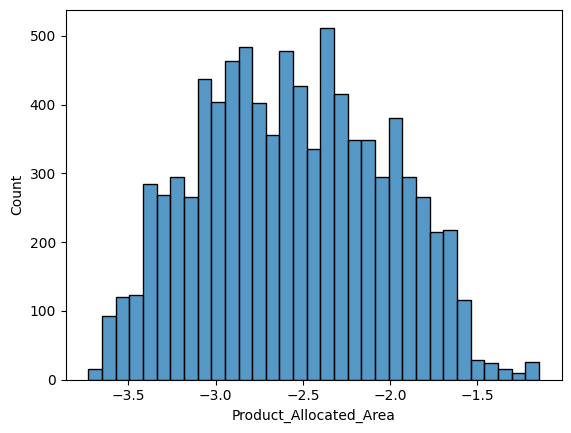

In [ ]:
#Log of function makes it less skewed
np.log(df['Product_Allocated_Area'])
sns.histplot(np.log(df['Product_Allocated_Area'] + .02)) #Adding a small bias to see if it helps make dist more symmetric

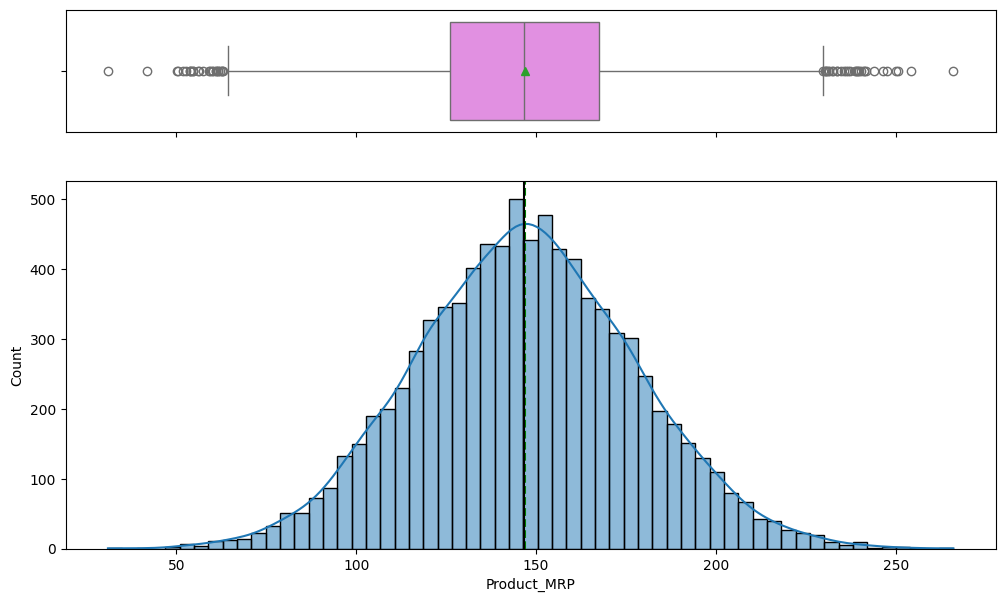

In [ ]:
histogram_boxplot(df, 'Product_MRP', kde=True)

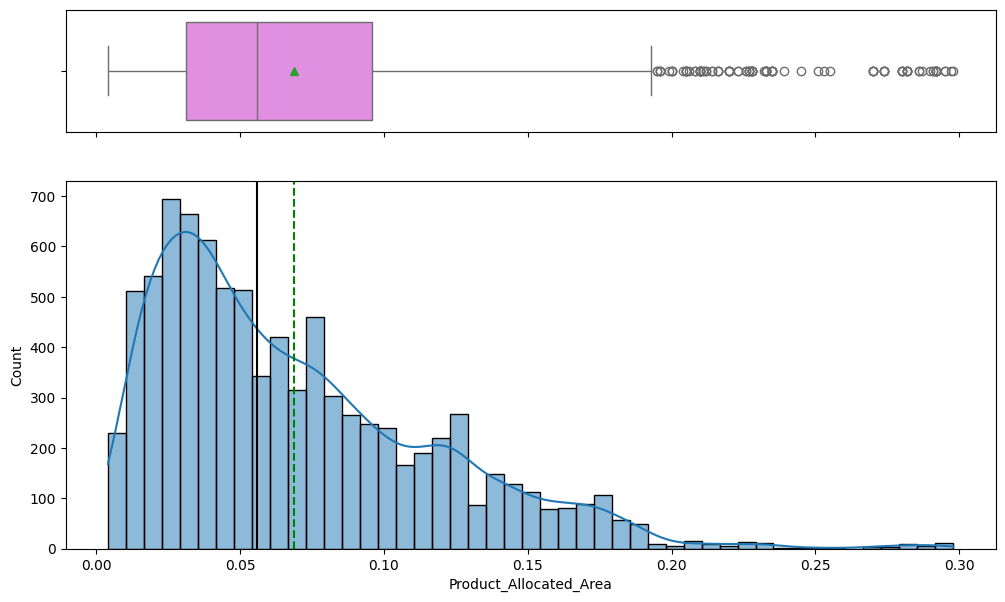

In [ ]:
histogram_boxplot(df, 'Product_Allocated_Area', kde=True)

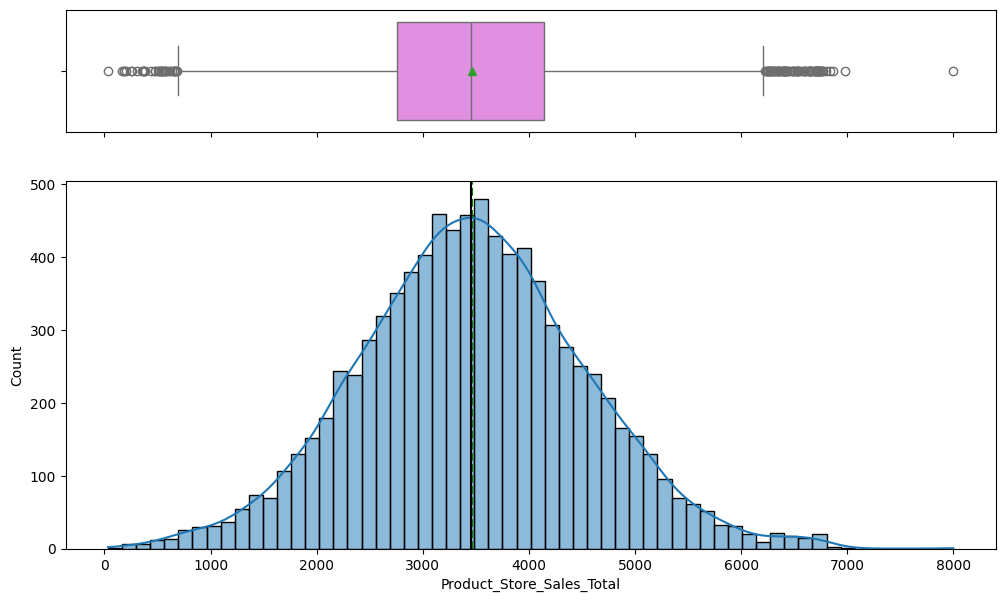

In [ ]:
histogram_boxplot(df, 'Product_Store_Sales_Total', kde=True)

In [ ]:
df['Store_Establishment_Year'].value_counts()
#Only 4 of them... so kind of like categorical then

2009    4676
1987    1586
1999    1349
1998    1152
Name: Store_Establishment_Year, dtype: int64

Univariate Analysis: Categorical Features

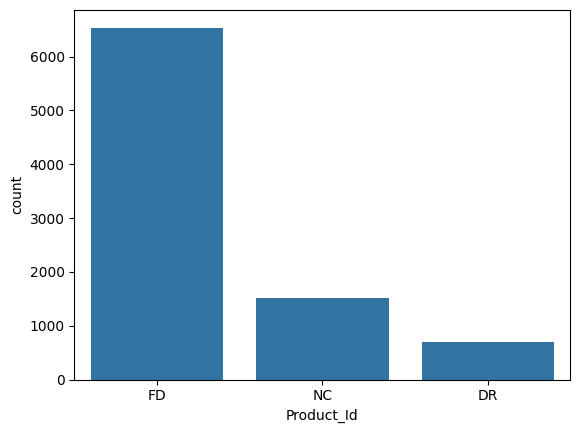

In [ ]:

ax = sns.countplot(data = df, x = 'Product_Id')

#We can annotate

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot
        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()



Count plot, goups in patches. Can see the height by .get_heights()or width .get_width() or coordinate .get_x()

In [ ]:
ax.patches[0].get_height()

6539.0

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


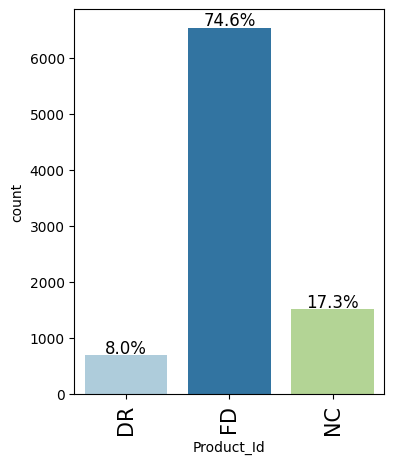

In [ ]:
labeled_barplot(df, 'Product_Id', perc = True) #show in percentage

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


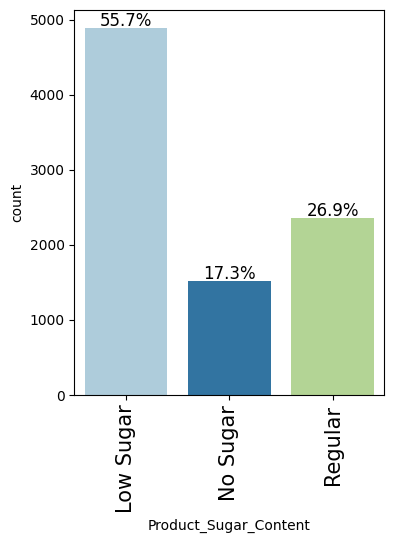

In [ ]:
labeled_barplot(df, 'Product_Sugar_Content', perc = True) #show in percentage

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


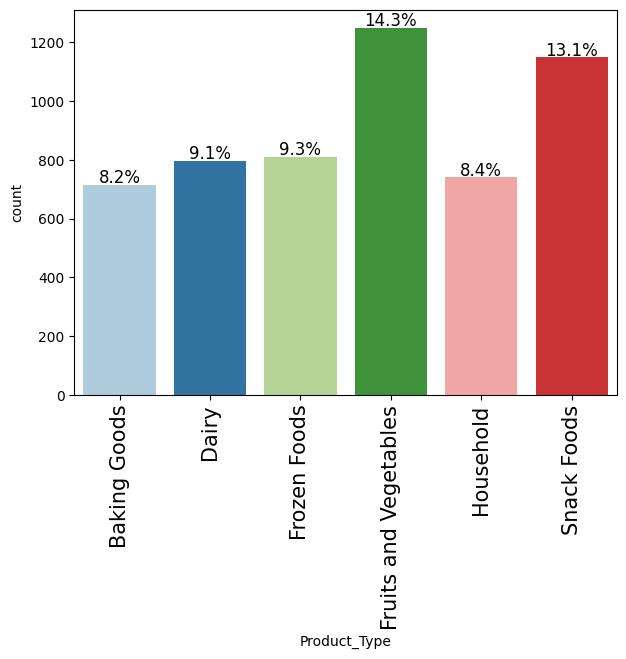

In [ ]:
labeled_barplot(df, 'Product_Type', perc = True, n=6) #Plot only 6 of the product types

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


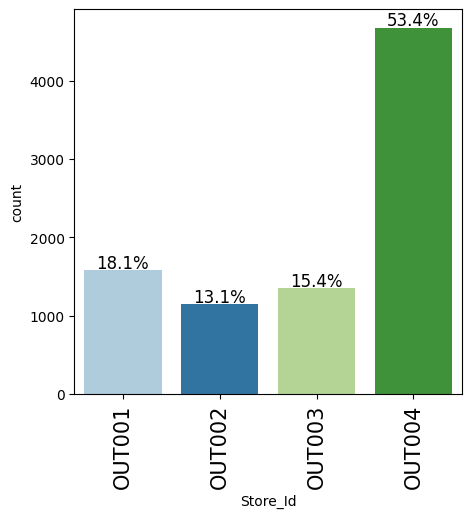

In [ ]:
labeled_barplot(df, 'Store_Id', perc = True)

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


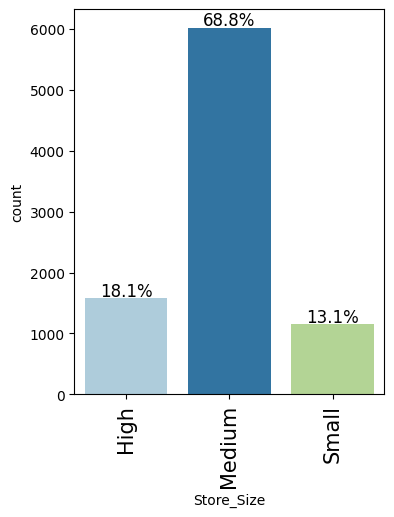

In [ ]:
labeled_barplot(df, 'Store_Size', perc = True)

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


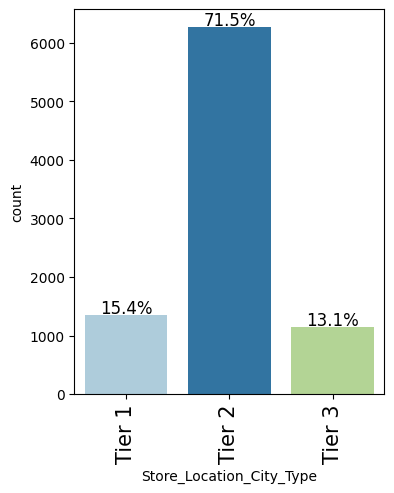

In [ ]:
labeled_barplot(df, 'Store_Location_City_Type', perc = True)

<ipython-input-34-308d8877360e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


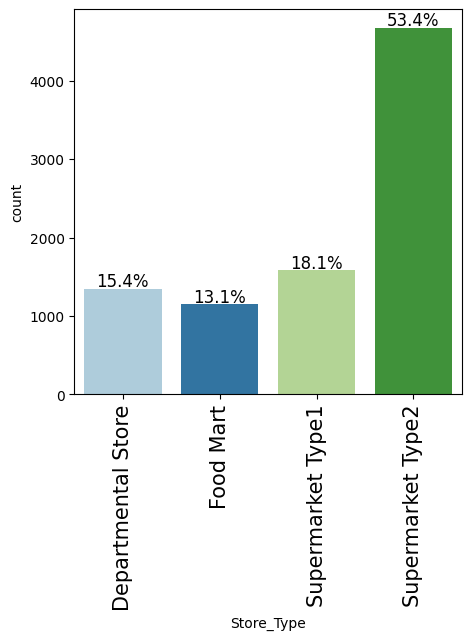

In [ ]:
labeled_barplot(df, 'Store_Type', perc = True)

Bivariate Analysis
See correlation to see if we can do predictions using a model

In [ ]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
Product_Weight,1.000000,0.014754,0.532716,-0.161907,0.737955
Product_Allocated_Area,0.014754,1.000000,-0.009508,0.004467,-0.000933
Product_MRP,0.532716,-0.009508,1.000000,-0.189357,0.787989
Store_Establishment_Year,-0.161907,0.004467,-0.189357,1.000000,-0.185027
Product_Store_Sales_Total,0.737955,-0.000933,0.787989,-0.185027,1.000000


<ipython-input-44-4a80a5800e2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.4f', cmap = 'viridis')


<Axes: >

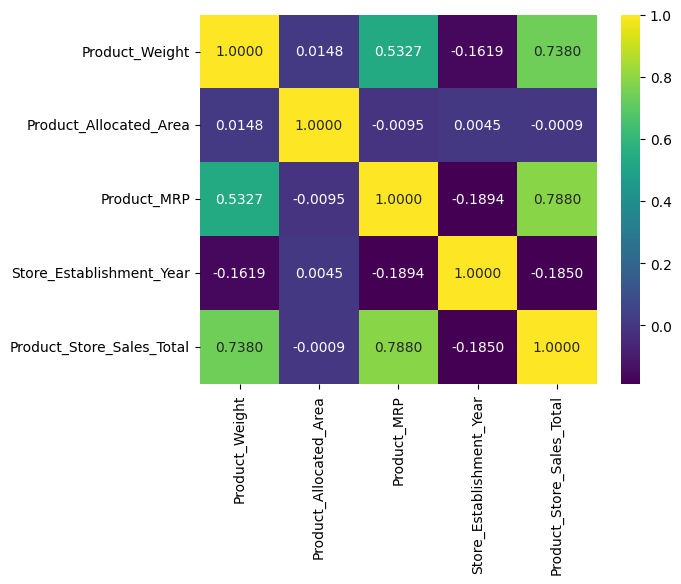

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.4f', cmap = 'viridis')

In [ ]:
df_rev = df.groupby(['Product_Id'], as_index = False)['Product_Store_Sales_Total'].sum() #Use regular index
df_rev


,Product_Id,Product_Store_Sales_Total
0,DR,2422859.34
1,FD,22662260.88
2,NC,5269943.68


<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

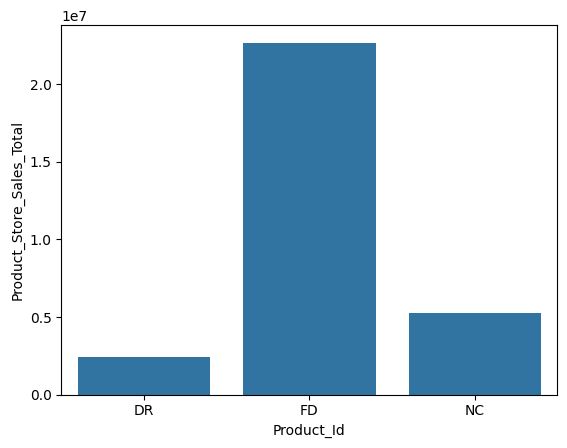

In [ ]:
sns.barplot(data=df_rev, x='Product_Id', y= 'Product_Store_Sales_Total')

<ipython-input-47-fb879a2a0b90>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Product_Id', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

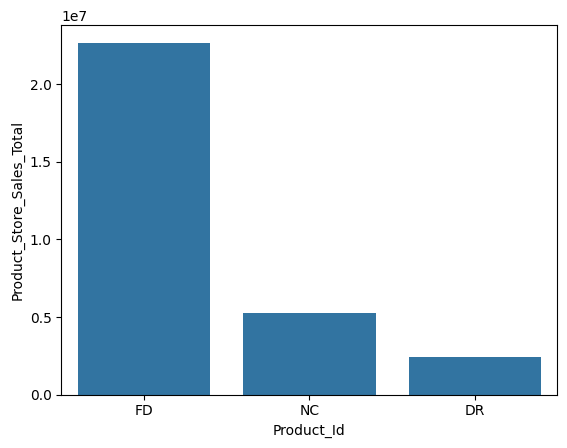

In [ ]:
#Or could do this
sns.barplot(data=df, x='Product_Id', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

We saw the relationship between productID and revenue, now lets see it with sugar content..

<ipython-input-48-1bd83cc75e58>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Product_Sugar_Content', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

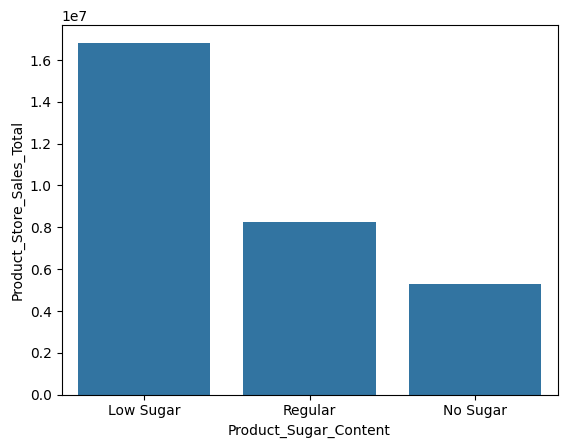

In [ ]:

sns.barplot(data=df, x='Product_Sugar_Content', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

<ipython-input-50-e09541265e0f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Product_Type', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

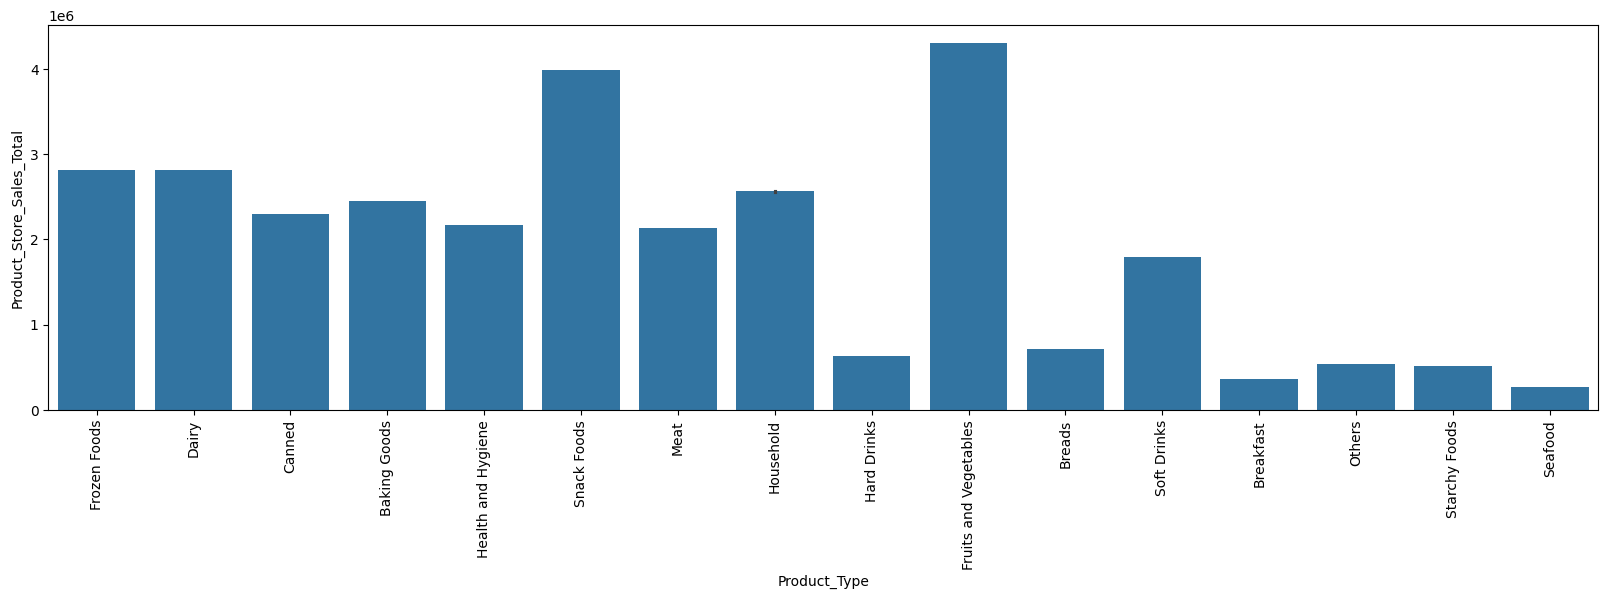

In [ ]:
#For Product Type
plt.figure(figsize = (20,5))

sns.barplot(data=df, x='Product_Type', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation=90)

<ipython-input-51-e337f523d69b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Id', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

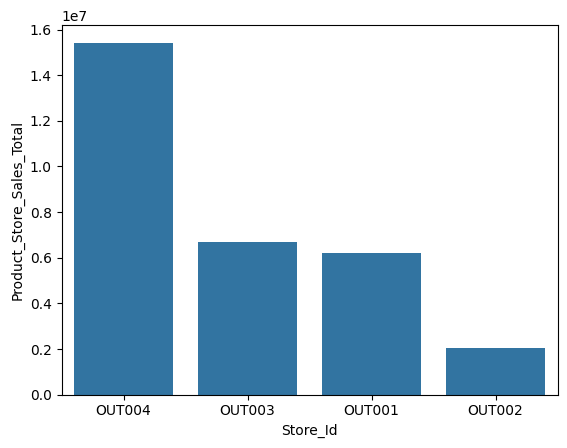

In [ ]:
#With store id
sns.barplot(data=df, x='Store_Id', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)

<ipython-input-57-a26f1744acaa>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Size', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2], [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

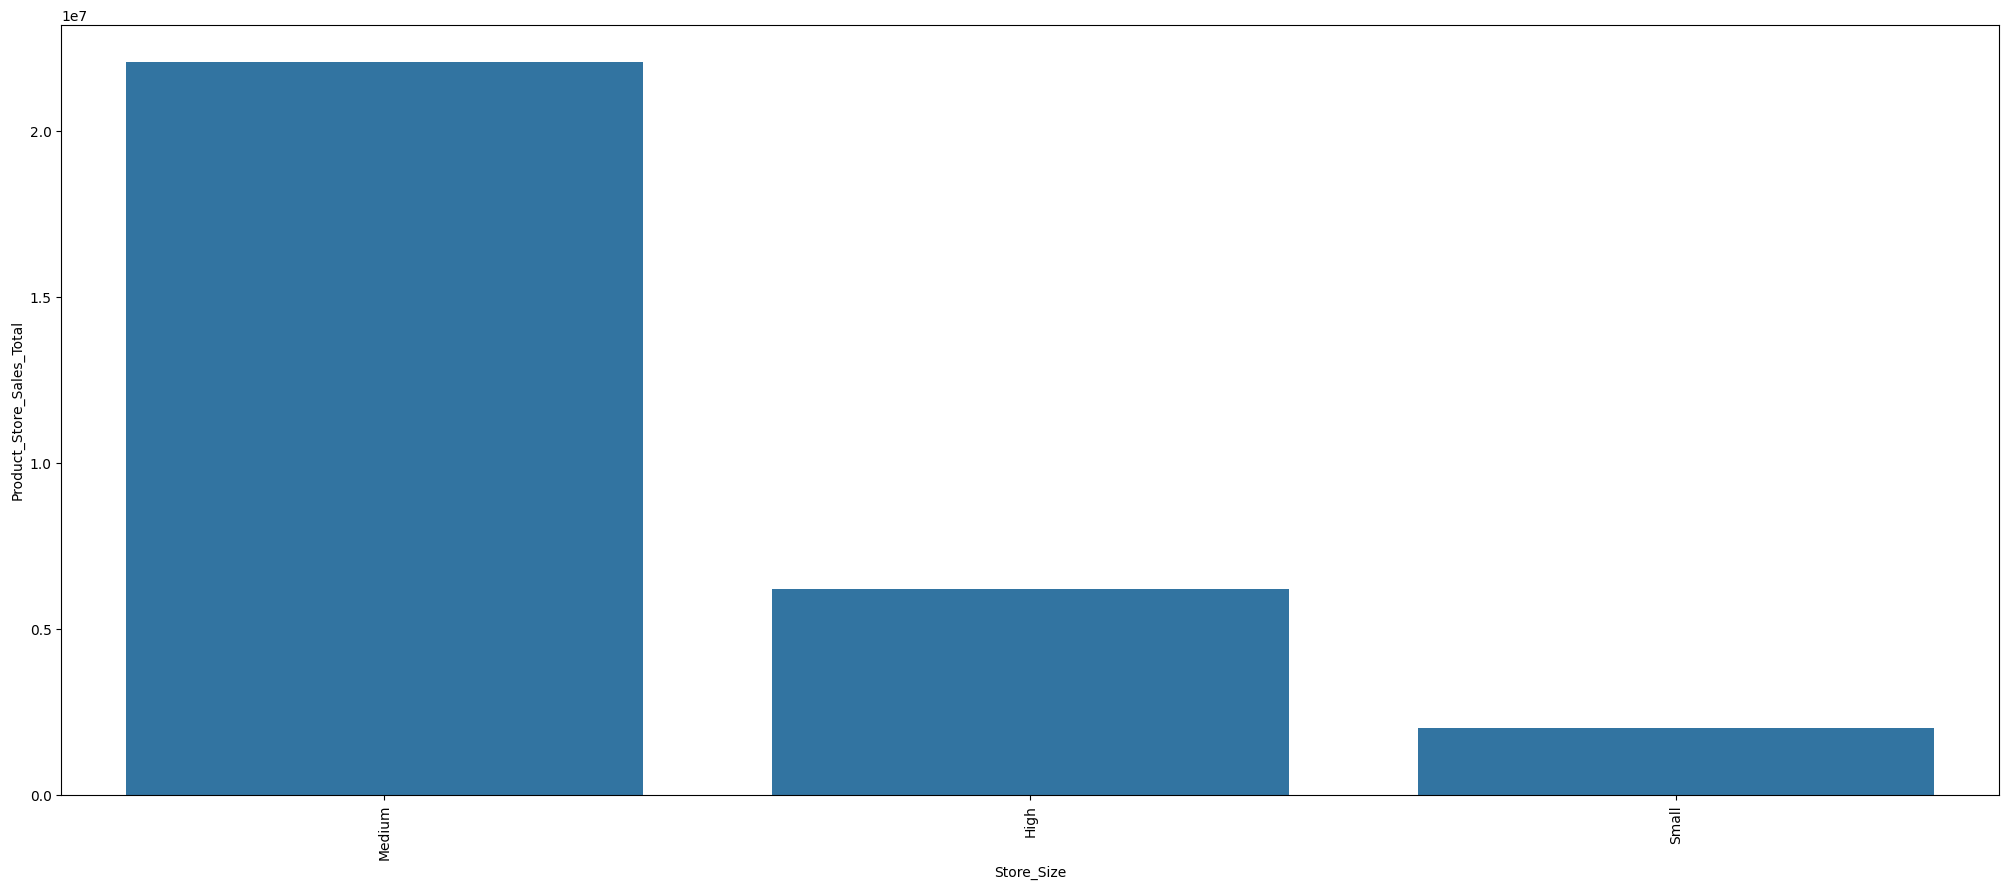

In [ ]:
#For Store Size
plt.figure(figsize = (25,10))

sns.barplot(data=df, x='Store_Size', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation=90)

<ipython-input-60-c6e92f5998b0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<Axes: xlabel='Store_Location_City_Type', ylabel='Product_Store_Sales_Total'>

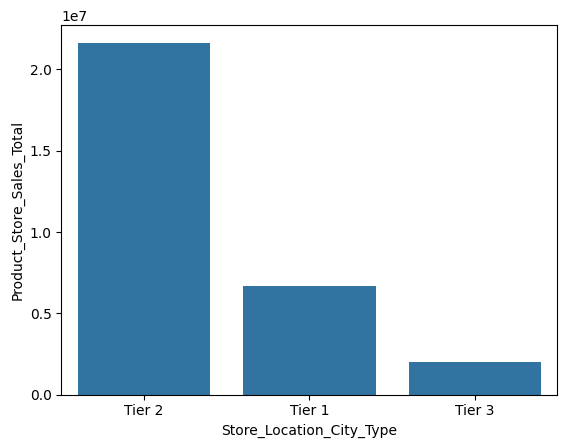

In [ ]:
#For Product Type
sns.barplot(data=df, x='Store_Location_City_Type', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


<ipython-input-61-e00d749139b7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data=df, x='Store_Type', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

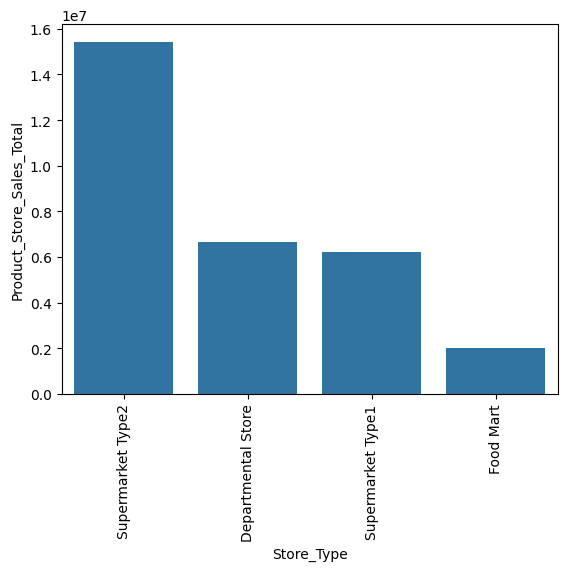

In [ ]:
#For Store Type

sns.barplot(data=df, x='Store_Type', y= 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation=90)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

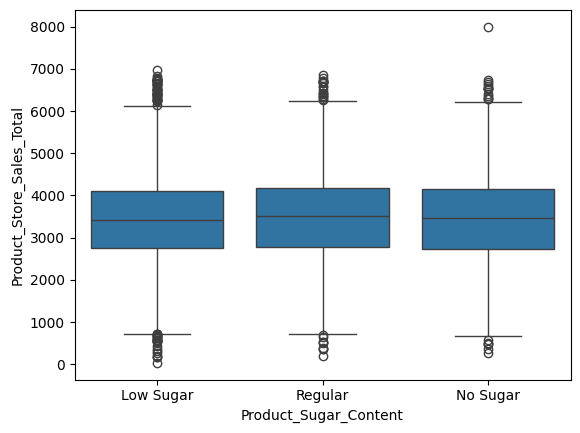

In [ ]:
sns.boxplot(data = df, x = 'Product_Sugar_Content', y = "Product_Store_Sales_Total")

Says the distribution is the same, but we saw in the graph aboveee that Low Sugar does generate high revenue

<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

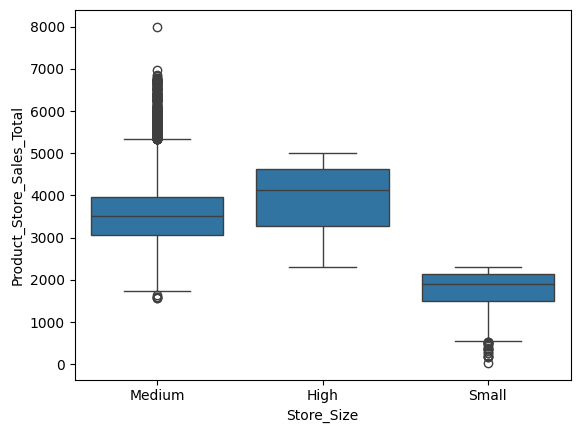

In [ ]:
sns.boxplot(data = df, x = 'Store_Size', y = "Product_Store_Sales_Total")

Overlap in Interquartile Ranges (IQR): The interquartile range (the box part of each boxplot) of the Medium and High categories overlap significantly. This means that the middle 50% of the sales data for Medium and High store sizes are quite similar.
Similar Medians: The median (the line in the middle of each box) for Medium and High store sizes are quite close to each other, suggesting that the central tendency of sales totals is similar for these two categories.
Outliers: While the 'Small' category has a notably lower IQR and median, indicating lower sales totals, it does have outliers that reach into the higher sales totals range, suggesting that there can be small stores with sales totals comparable to medium and high store sizes.
Spread of Data: The whiskers (the lines extending from the box) which indicate the range of the data, excluding outliers, are also quite long for all categories, especially for Medium and High, indicating a wide spread of data.

<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

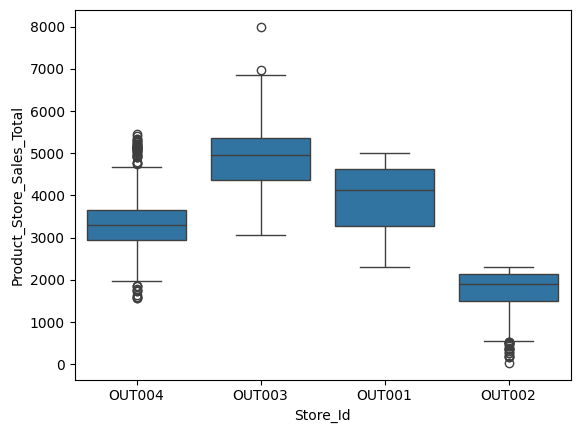

In [ ]:
sns.boxplot(data = df, x = 'Store_Id', y = "Product_Store_Sales_Total")

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

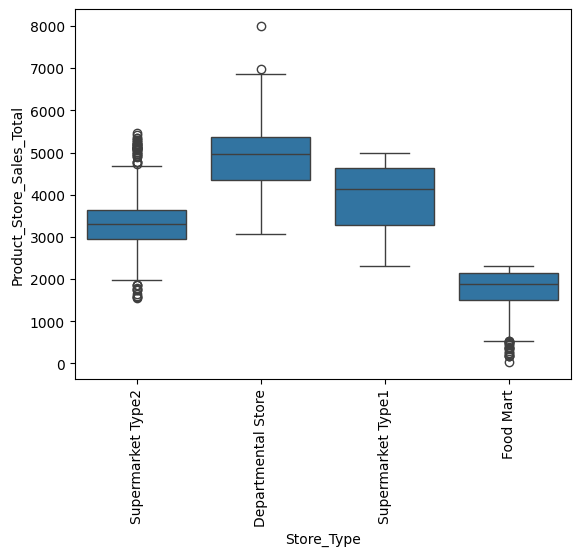

In [ ]:

sns.boxplot(data = df, x = 'Store_Type', y = "Product_Store_Sales_Total")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

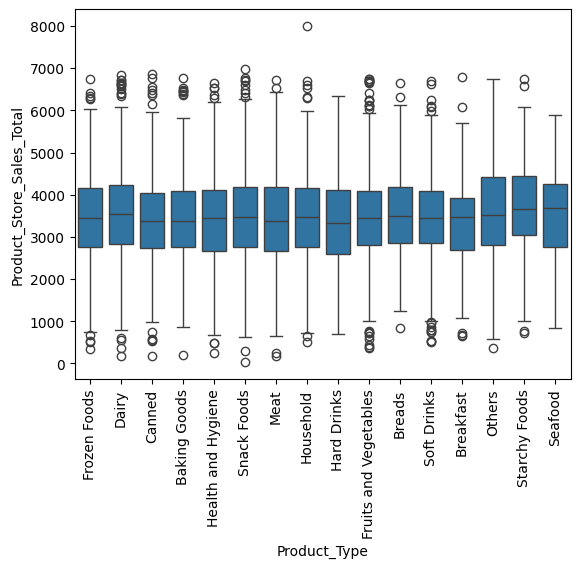

In [ ]:
sns.boxplot(data = df, x = 'Product_Type', y = "Product_Store_Sales_Total")
plt.xticks(rotation=90)

Store Analysis

In [ ]:
df['Store_Id'].value_counts()

OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64

In [ ]:
df.groupby('Store_Id')['Product_Store_Sales_Total'].sum()

Store_Id
OUT001     6223113.18
OUT002     2030909.72
OUT003     6673457.57
OUT004    15427583.43
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-76-0be7ea2a7250>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id']== 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

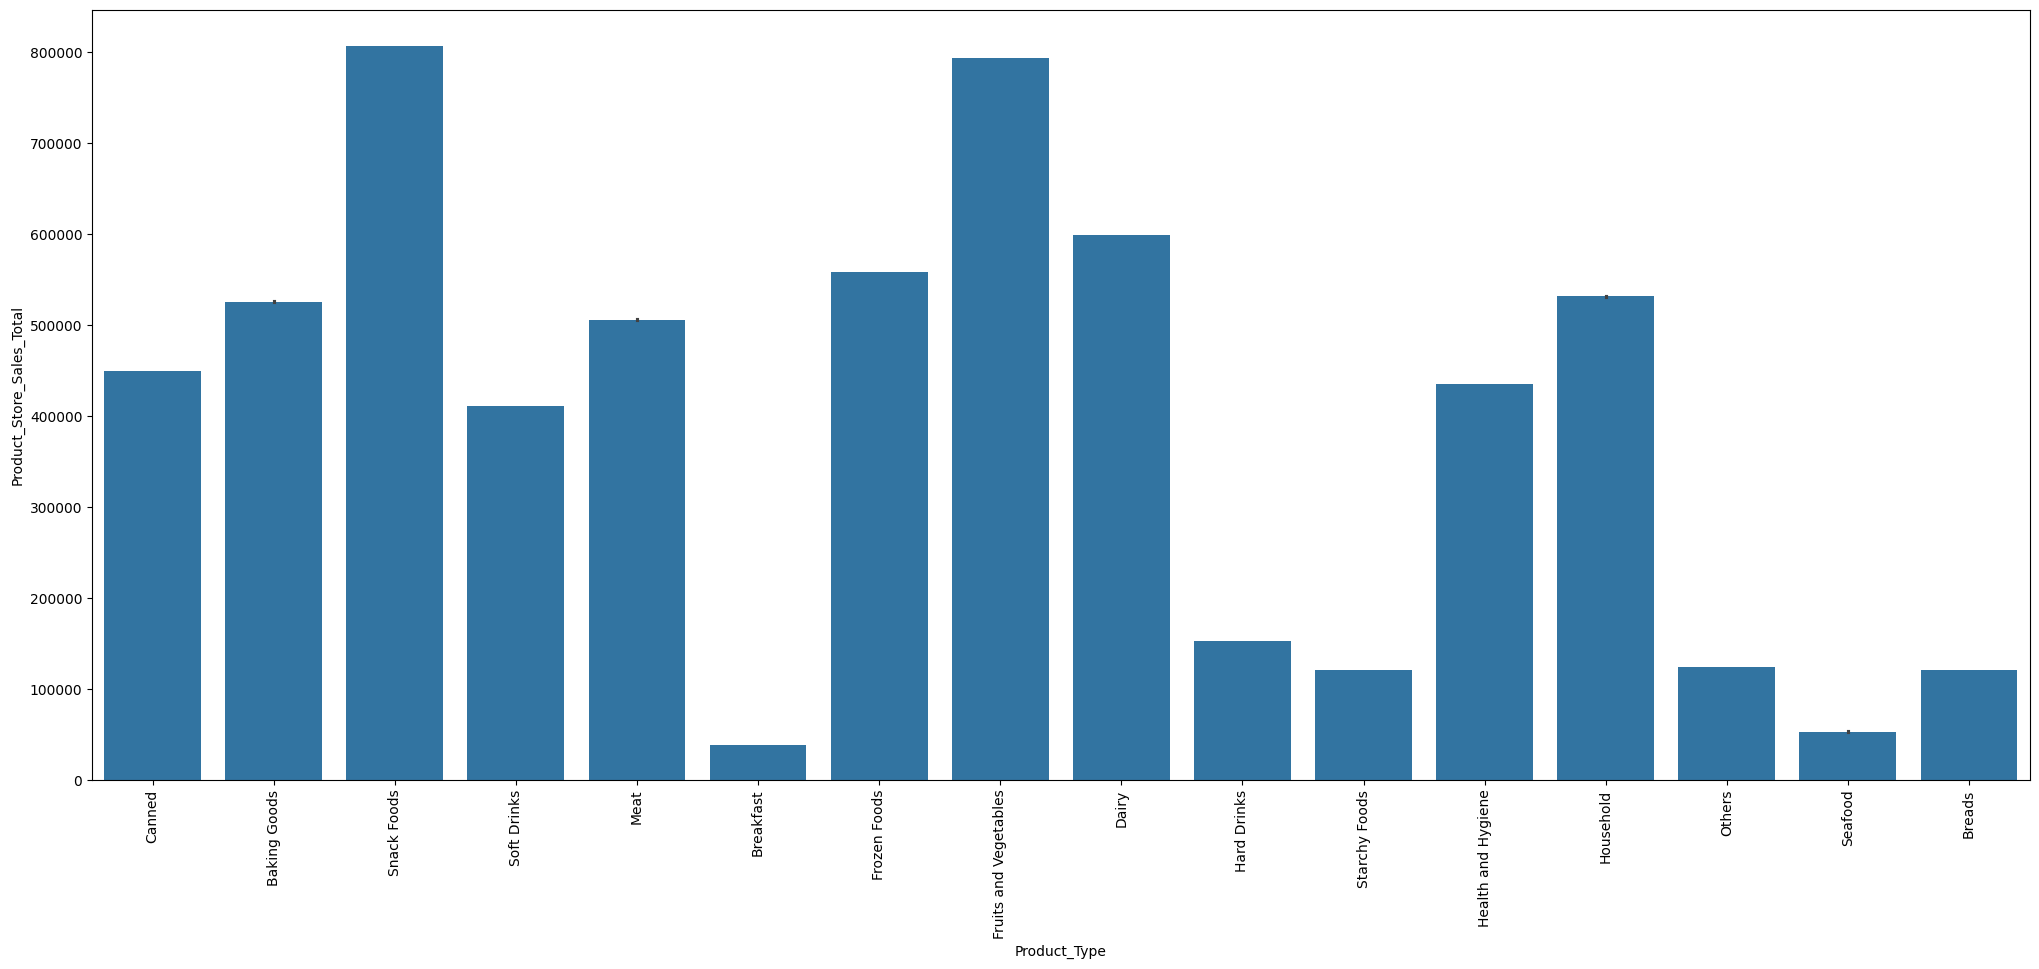

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = df[df['Store_Id']== 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

<ipython-input-77-c3da4da4514d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id']== 'OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

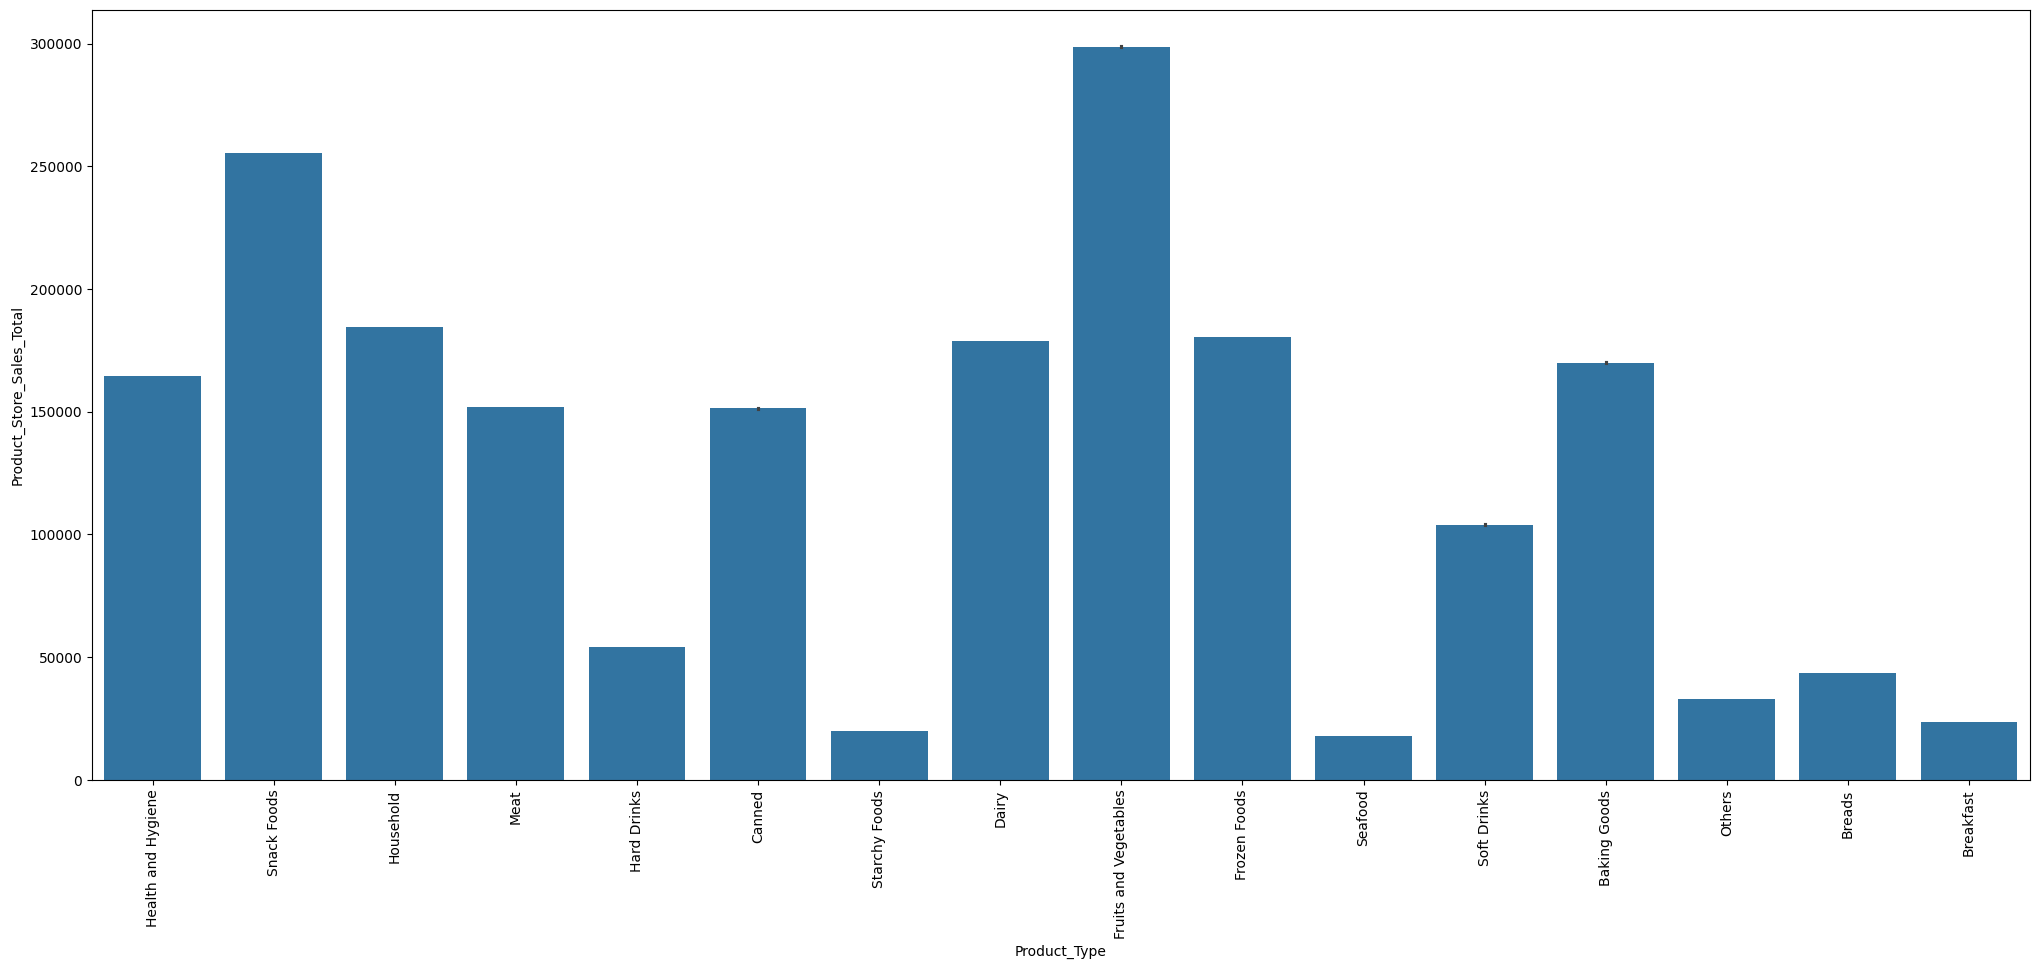

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = df[df['Store_Id']== 'OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

<ipython-input-78-9d63bd75647b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id']== 'OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

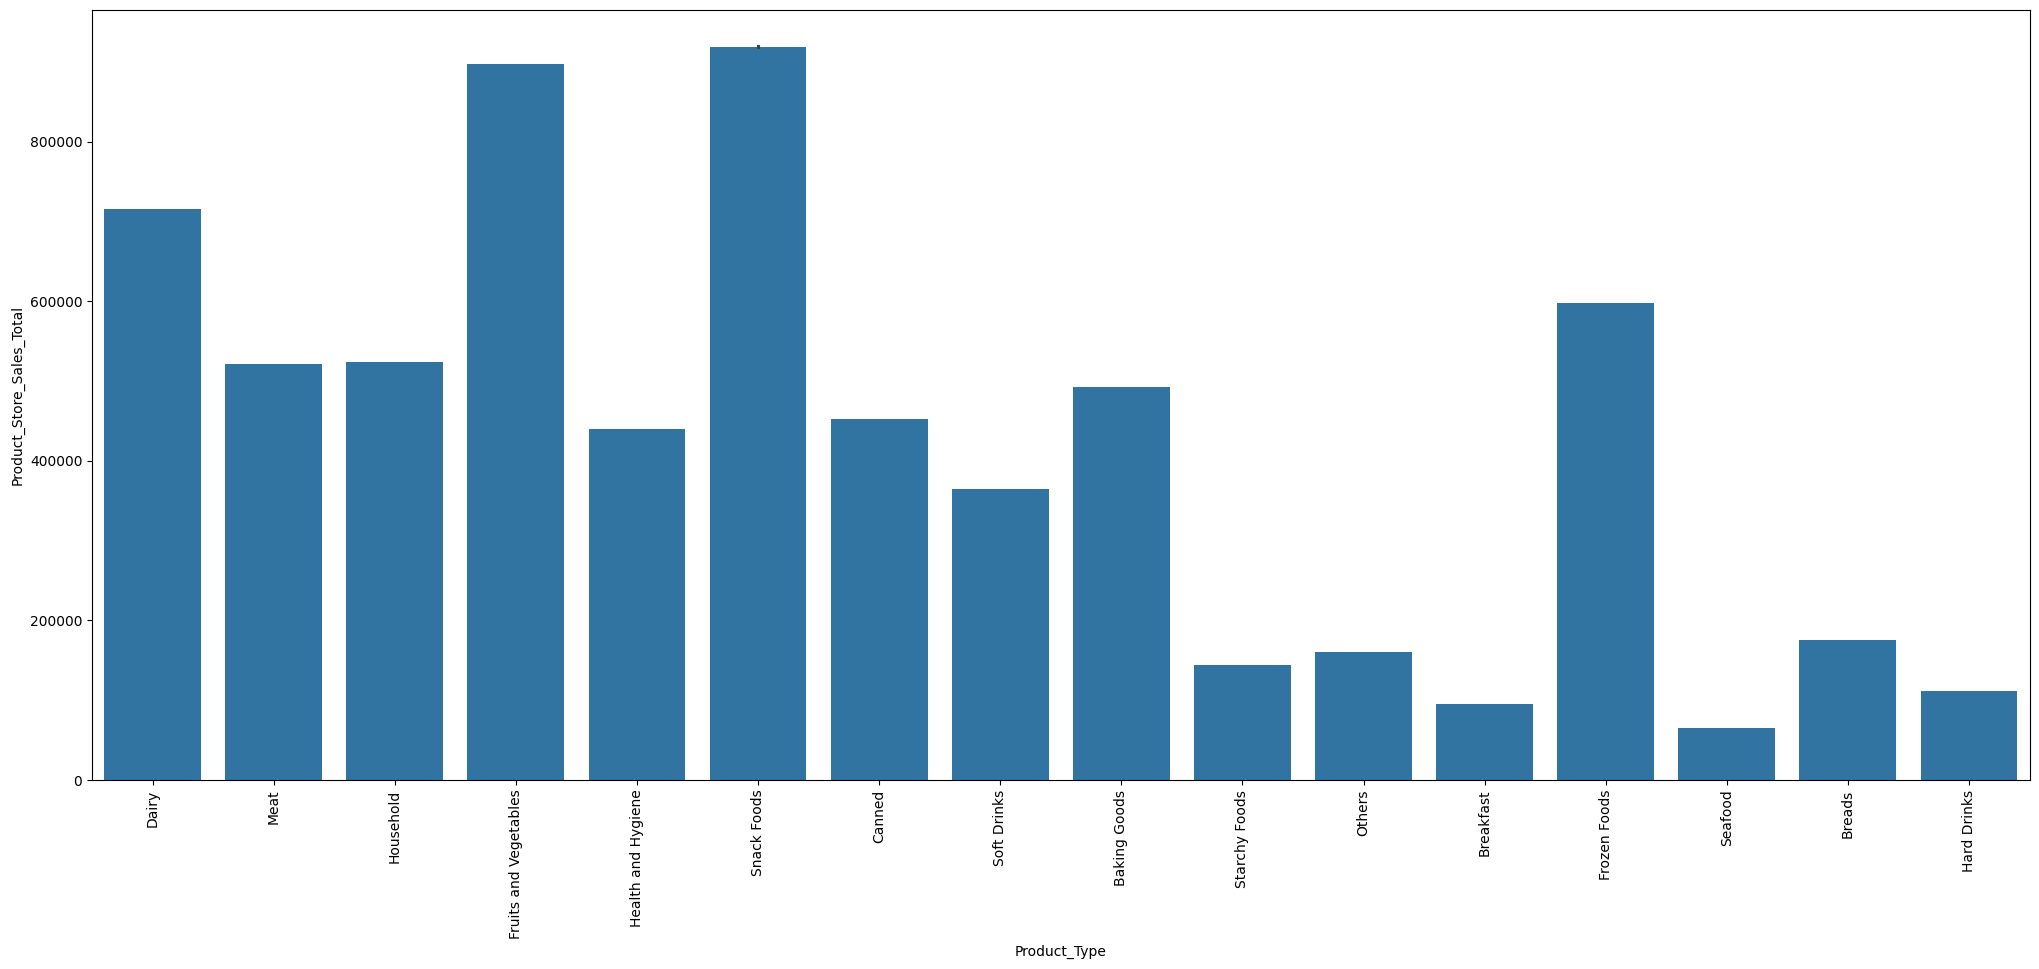

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = df[df['Store_Id']== 'OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

<ipython-input-79-cad72f93bd1f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id']== 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

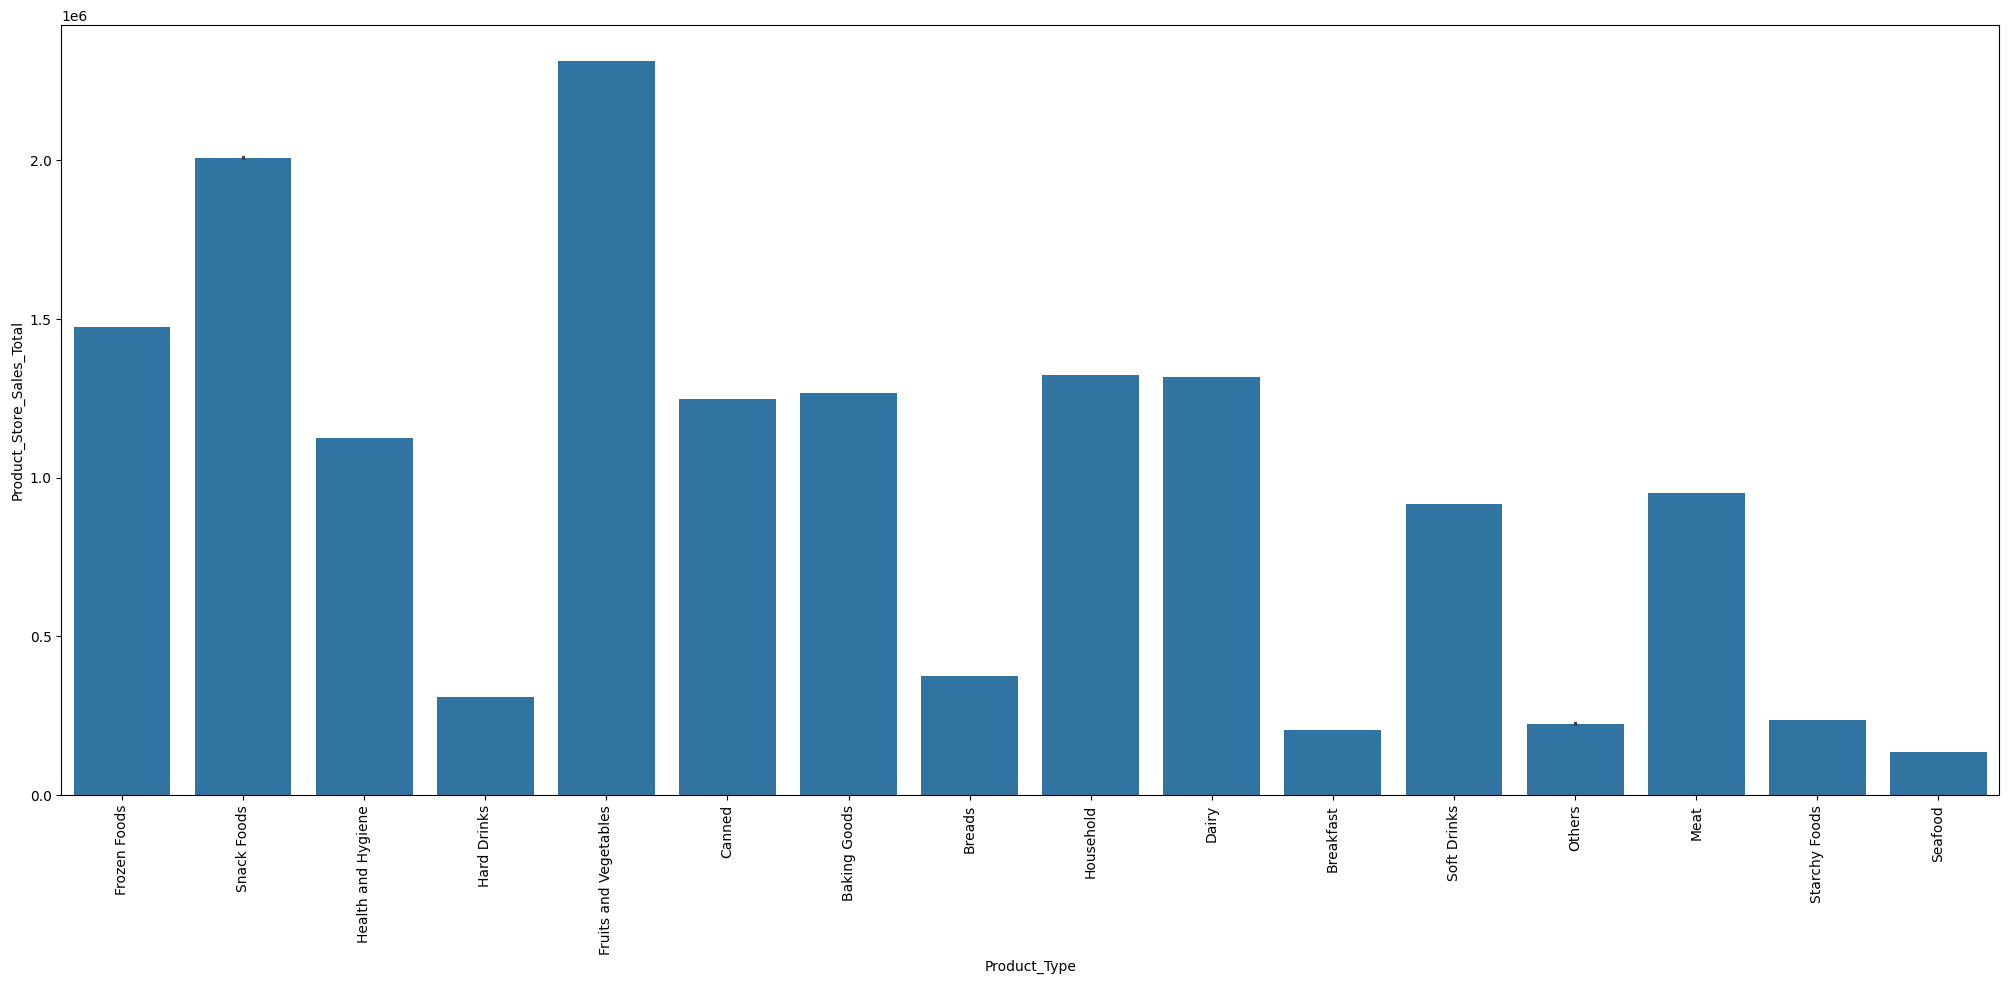

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = df[df['Store_Id']== 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks(rotation = 90)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


Store 3 and 4 are where out most revenue comes from. I want to see if there are any products on Store 4 that are not in Store 3

In [ ]:
pd.crosstab(df['Store_Id'], df['Product_Type'])
# Creates a matrix to show for each of the store ID, how many products exist

Product_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Store_Id,,,,,,,,,,,,,,,,
OUT001,136,30,10,119,150,142,199,38,114,134,130,31,13,202,106,32
OUT002,96,23,15,88,104,101,168,30,91,100,87,19,10,146,62,12
OUT003,99,34,19,90,145,122,182,23,89,107,106,32,13,186,74,28
OUT004,385,113,62,380,397,446,700,95,334,399,295,69,40,615,277,69


<Axes: xlabel='Product_Type', ylabel='Store_Id'>

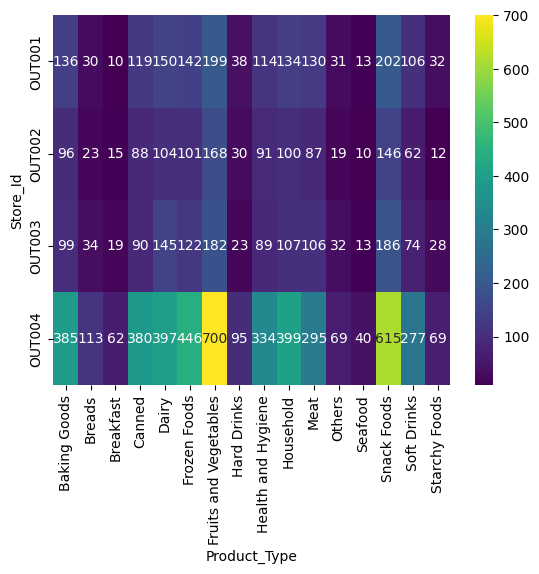

In [ ]:
#Lets visualize
sns.heatmap(pd.crosstab(df['Store_Id'], df['Product_Type']), annot = True, cmap= 'viridis', fmt ='g')

<Axes: xlabel='Product_Type', ylabel='Product_Sugar_Content'>

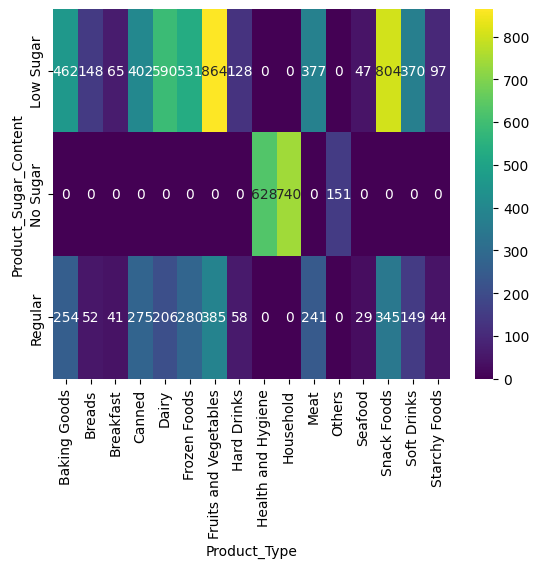

In [ ]:
#Lets visualize
sns.heatmap(pd.crosstab(df['Product_Sugar_Content'], df['Product_Type']), annot = True, cmap= 'viridis', fmt ='g')

Now EDA is complete, we can begin Linear Regression.
- We are going to predict the continuous variable; product store sales total

Change establishment to age so model has easier time learning, and this caries a lot of value

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df['Store_Age'] = 2024 - df['Store_Establishment_Year']

In [ ]:
df.drop(columns=['Store_Establishment_Year'], axis = 0, inplace = True)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,15
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,25


Lets look at product type..

In [ ]:
df['Product_Type'].value_counts().index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Frozen Foods',
 'Dairy',
 'Household',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

In [ ]:
#Create new columns for perishable
Perishabels =['Fruits and Vegetables', 'Dairy', 'Meat', 'Breads', 'Breakfast', 'Seafood']

#Differenciate bn perishable and non perishable

def product_type_perishable(X):
  if X in Perishabels:
    return 'Persihable'
  else:
    return 'Non Perishable'

In [ ]:
df['Product_Type_Categories'] = df['Product_Type'].apply(product_type_perishable)

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Type_Categories
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,15,Non Perishable
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,25,Persihable
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,37,Non Perishable
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,37,Non Perishable
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,26,Non Perishable


Lets drop the product type column now ( since we have the product type category column now) it is not necessary, we do not want to make it complicated for our model.

In [ ]:
df['Product_Type_Categories'].value_counts()

Non Perishable    5718
Persihable        3045
Name: Product_Type_Categories, dtype: int64

In [ ]:
df.drop(columns = ['Product_Type'], axis = 0, inplace = True)

Lets check outliers in the numerical data

In [ ]:
#Only select numerical columns
num_cols = df.select_dtypes(include = np.number).columns.to_list()
num_cols

['Product_Weight',
 'Product_Allocated_Area',
 'Product_MRP',
 'Product_Store_Sales_Total',
 'Store_Age']

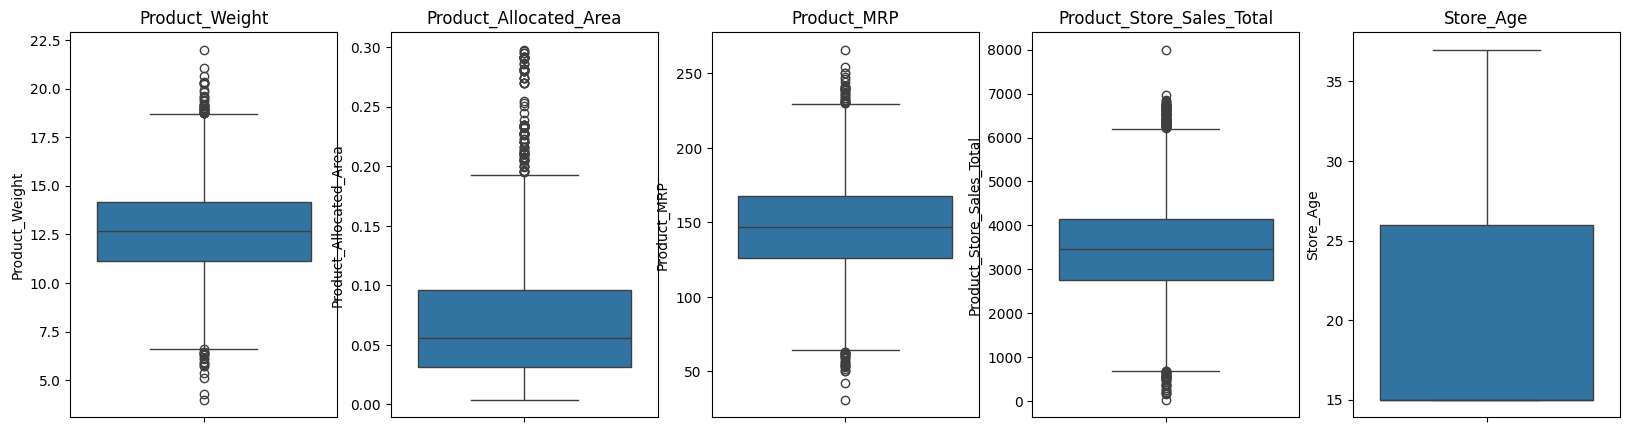

In [ ]:
fig, ax = plt.subplots(1,5, figsize =(20,5))
j = 0
for i in num_cols:
  sns.boxplot(df[i], ax=ax[j]).set(title = i)
  j+=1

Outliers are nothing out of the ordinary, there could be products priceier than others, some stores are older, some stores are required to be larger, and the product weight too cold have outliers, NOTHING OUT OF THE ORDINARY.
For Product store sales, it is our dependent variable, so obv we cannot take it out/drop it.

Feature engineering involves the process of preparing and transforming the data to enhance the performance of machine learning models.
It includes tasks such as selecting relevant features, creating new features, handling missing data, and transforming variables to better suit the requirements of the model.
Effective feature engineering can significantly impact the model's ability to learn patterns and make accurate predictions.

Checking for outliers in numerical features is essential to identify extreme values that could potentially impact the performance of a machine learning model.
Outliers can introduce noise, affect the distribution of the data, and impact the model's ability to generalize well.
Special treatment, such as transformation or removal, may be needed for outliers to improve the model's robustness.

Now, let us split our dataset into training and validation set.

Our model does not understand categorical features, so we have to encode them. We can use onehot encoding or sklearn to do so

In [ ]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

In [ ]:
col_of_obj = df.select_dtypes(include = 'object').columns.to_list()

In [ ]:
df_ohe = pd.get_dummies(df, columns = col_of_obj, drop_first = True )

#drop first = true, after encoding three similar  columns, it generates only 2 because it would be redundent, the info is already included in the first two
#Makes easier for model

In [ ]:
X = df_ohe.drop('Product_Store_Sales_Total', axis = 1)
y = df_ohe['Product_Store_Sales_Total']

In [ ]:
X.shape

(8763, 19)

In [ ]:
y.shape

(8763,)

In you are using the stats model librabry ( not the sk learn), you have to use constants

In [ ]:
import statsmodels.api as sm

In [ ]:
X=sm.add_constant(x)

In [ ]:
X.head()

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Persihable
0,1.0,12.66,0.027,117.08,15,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
1,1.0,16.54,0.144,171.43,25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,1.0,14.28,0.031,162.08,37,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,1.0,12.10,0.112,186.31,37,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1.0,9.57,0.010,123.67,26,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0


The const is used to add the feature

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [ ]:
X_train.shape

(6134, 20)

In [ ]:
X_test.shape

(2629, 20)

In [ ]:
y_test.shape

(2629,)

In [ ]:
y_train.shape

(6134,)

Lets make sure there are no multicolinearity; features are not dependent)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

We usually want VIF to be less than 5;  (it ranged from 0 to infinity)

In [ ]:
VIF_df = pd.DataFrame()
VIF_df['features'] = X_train.columns
VIF_df['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

VIF_df


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Store_Age,inf
5,Product_Id_FD,2.841545
6,Product_Id_NC,inf
7,Product_Sugar_Content_No Sugar,inf
8,Product_Sugar_Content_Regular,1.086384
9,Store_Id_OUT002,inf


Inf value in store age; indicates that it could have been made by having the data of the other columns (esp those with inf VIF).
So, we need to drop it. For the encoded features, and the non cont. features, no need to drop

In [ ]:
X_train.drop(columns=['Store_Age'], axis = 0, inplace = True)
X_test.drop(columns=['Store_Age'], axis = 0, inplace = True)

Now, lets see the VIF again..

In [ ]:
VIF_df = pd.DataFrame()
VIF_df['features'] = X_train.columns
VIF_df['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,vif
0,const,0.000000
1,Product_Weight,1.790910
2,Product_Allocated_Area,1.001068
3,Product_MRP,1.932903
4,Product_Id_FD,2.841545
5,Product_Id_NC,inf
6,Product_Sugar_Content_No Sugar,inf
7,Product_Sugar_Content_Regular,1.086384
8,Store_Id_OUT002,inf
9,Store_Id_OUT003,inf


We will be using OLS


In [ ]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2806.
Date:                       Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                               04:30:47   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.244e+04
Df Residuals:                           6123   BIC:                         9.252e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -9.2899     34.214     -0.272      0.786     -76.361      57.781
Product_Weight                       136.6200      3.472     39.348      0.000     129.813     143.426
Product_Allocated_Area                57.1761    119.905      0.477      0.633    -177.879     292.231
Product_MRP                           13.1178      0.262     49.976      0.000      12.603      13.632
Product_Id_FD                        -24.2278     22.464     -1.079      0.281     -68.264      19.809
Product_Id_NC                         11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_No Sugar        11.3760     12.569      0.905      0.365     -13.265      36.016
Product_Sugar_Content_Regular         23.1491     13.552      1.708      0.088      -3.418      49.717
Store_Id_OUT002                     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Id_OUT003                      331.9870     19.997     16.602      0.000     292.787     371.188
Store_Id_OUT004                     -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Store_Size_Medium                    169.1931     16.695     10.135      0.000     136.466     201.920
Store_Size_Small                    -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Location_City_Type_Tier 2      -92.4400     13.451     -6.872      0.000    -118.809     -66.071
Store_Location_City_Type_Tier 3     -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Food Mart                -248.8369      4.972    -50.052      0.000    -258.583    -239.091
Store_Type_Supermarket Type1          70.3539     16.609      4.236      0.000      37.794     102.914
Store_Type_Supermarket Type2        -162.7939      5.244    -31.046      0.000    -173.073    -152.515
Product_Type_Categories_Persihable    26.8072     13.404      2.000      0.046       0.530      53.085
==============================================================================
Omnibus:                     1947.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49023.766
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.718   Cond. No.                     4.28e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
y_hat = model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
r2_score(y_train, y_hat)

0.8208895053824232

In [ ]:
mean_squared_error(y_train, y_hat)

204716.9688103638

In [ ]:

def model_evaluation(model, x, y):
  y_hat = model.predict(x)
  rmse = np.sqrt(mean_squared_error(y, y_hat))
  mae = mean_absolute_error(y, y_hat)
  mape = mean_absolute_percentage_error(y, y_hat)
  r2 = r2_score(y, y_hat)
  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})

In [ ]:
model_evaluation(model, X_train, y_train)

,RMSE,MAE,MAPE,R2
0,452.456593,262.597661,0.100454,0.82089


In [ ]:
model_evaluation(model, X_test, y_test)

,RMSE,MAE,MAPE,R2
0,432.787951,252.636159,0.096217,0.832444


82 percent R squared is good

Model actually does better on test compared to training

We could  check the p-values of the columns: for those that are high, we can drop them becaus it means they are not significant, so we can drop them and re-train the model to see if it does better. (But we won't do that here)

Now that model is trainied, lets find the resifual

In [ ]:
model.resid
#= y_train - model.predict(X_train)

8361   -603.074098
2244     80.560876
5530   -247.704609
322     -91.443136
4688     39.545034
           ...    
4373     44.797511
7891    248.902223
4859    122.286259
3264     82.168624
2732     -7.059983
Length: 6134, dtype: float64

In [ ]:
#Mean: lets calculate mean of resuidal, it needs to be 0 is the model is trainied well
np.mean(model.resid)

2.7287806474452187e-12

In [ ]:
#Test homosodasity: variablity of the errors/ residuals is constant


#Nullm Hypothesis = the residual is homododastic
# Alternate hypothesis = the residual is heterosadastic

#We reject/accept the null hypothesis based on the p-value
model.fittedvalues #=model.predict(X_trian)

8361    2919.564098
2244    3973.259124
5530    2840.654609
322     3097.853136
4688    3398.754966
           ...     
4373    3988.782489
7891    3696.687777
4859    1541.653741
3264    4036.321376
2732    3269.799983
Length: 6134, dtype: float64

Text(0.5, 1.0, 'Residuas vs Fitted Values')

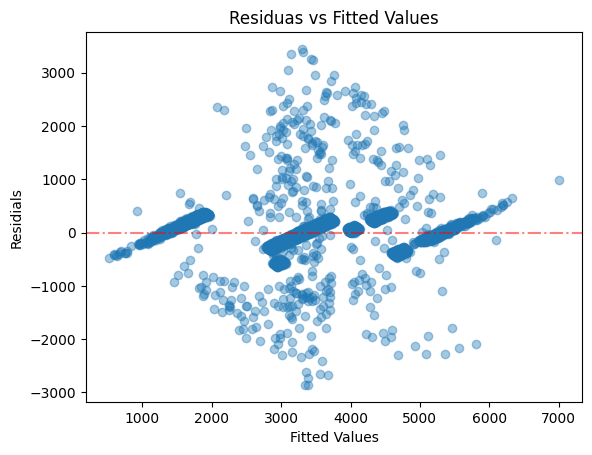

In [ ]:
#Lets see the districution
plt.scatter(model.fittedvalues, model.resid, alpha = 0.4) # alpha , for moretransparency, and to see dense areas
plt.axhline(0, color ='r', alpha = 0.5, linestyle = '-.')
plt.xlabel('Fitted Values')
plt.ylabel('Residials')
plt.title('Residuas vs Fitted Values')
#The line is the 0; we can see some symmetry with the residual with respect to varience


In [ ]:
import statsmodels.stats.api as sns


#using the goldfeldquan test
result = sns.het_goldfeldquandt(y_train, X_train)

In [ ]:
result #>0.05
#p value is the second item


(0.903001831057537, 0.9975938945640488, 'increasing')

Becuse the model is greater than the significance value, we reject the null hypothesis

Is the distribution of the errors normal of not?


In [ ]:
#Linearity of varibale
#Plot residual vs Fitted values and see if there's a pattern; if it completely bkack and whiye noise, we are good
#Ours looks okay

<Axes: ylabel='Count'>

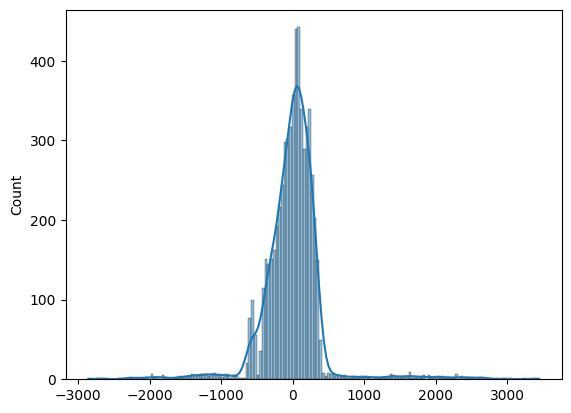

In [ ]:
#Normaity of error
sns.histplot(model.resid, kde = True)

Visualizing in a different way..

((array([-3.68803911, -3.45585563, -3.3280438 , ...,  3.3280438 ,
          3.45585563,  3.68803911]),
  array([-2858.79890544, -2855.22538302, -2720.42581562, ...,
          3349.7209442 ,  3381.1126455 ,  3445.79253939])),
 (395.06359610717976, 2.6553770416903878e-12, 0.8726675013810739))

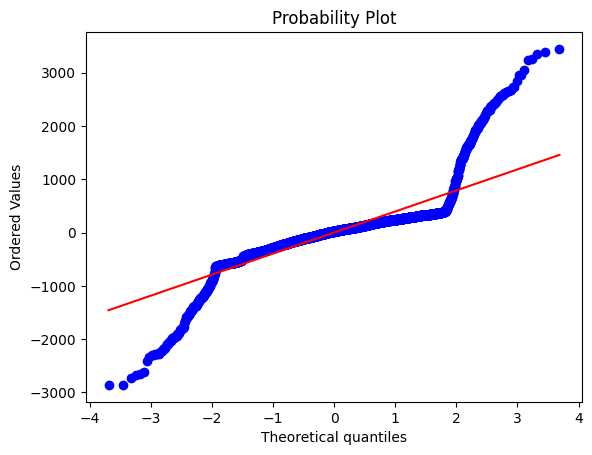

In [ ]:
#Compare my residual dist. with a normal dist using a quartile value
# If the output is linear, or a flat line, we can say the assumption of the residual being normally distrubuted is acceptable
import pylab
from scipy import stats

#Comparing with a normal dist
stats.probplot(model.resid,dist = 'norm', plot = pylab)

Linear red line indicated our residual is normally distributted.

Cross Validation:

If we split the training dataset in another way, will we get teh same R squred erros and such? We can use the corss-val score (a function from sklearn), because sklearn made the training sets in chunks
You can calculate the errors and SD of these chucnks


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
model2 = LinearRegression()

#10 folds
mae = cross_val_score(model2, X_train, y_train, cv = 10, scoring='neg_mean_absolute_percentage_error') #neg bc it works backwards.

In [ ]:
np.mean(-mae)

0.10079422025575147

In [ ]:
np.std(mae)

0.01059073297833426

In [ ]:
# % 99.7 percent of the time, our error stays between 7 percent all the way to 13 percent
# That is what cross validation tells me
np.mean(-mae) - 3 * np.std(mae), np.mean(mae) + 3* np.std(mae)

(0.0690220213207487, -0.0690220213207487)

In [ ]:

 #see that this value is close to the folds ~ 10
 np.mean(cross_val_score(model2, X_train, y_train, cv = 10, scoring='neg_mean_absolute_percentage_error'))

-0.10079422025575147

These results suggest that the Linear Regression model has a mean absolute percentage error of around 10.08%, with a relatively low standard deviation in its error across the 10 folds of cross-validation, indicating consistent performance. The confidence interval, although incorrectly calculated in the provided snippet, is meant to provide a range of expected error under normal conditions.

In the context of evaluating which model produced the best error, this information is crucial. To determine if this model performed the best, we would need to compare these results with those from other models evaluated using the same metrics and methodology. The model with the lowest MAPE would generally be considered the best performer for this specific task, assuming all other factors are equal.